In [1]:
# Assume these are in base env
using PyPlot, Revise, Printf

In [2]:
using QInchworm.diagrammatics

In [3]:
function make_arc(x1, x2; kwargs...)
    width = x2 - x1
    height = width
    arc = matplotlib.patches.Arc((x2 - width/2, 0.0), width, height, theta2=180.0; kwargs...)
    return arc
end

function plot_topology!(ax, vertices, t::diagrammatics.Topology, k::Int = 0)
    connected, disconnected = diagrammatics.split_k_connected(t.pairs, k)
    diagrammatics.traverse_crossing_graph_dfs!(connected, disconnected)

    for p in connected
      arc = make_arc(vertices[p.first], vertices[p.second]; edgecolor="black")
      ax.add_patch(arc)
    end

    for p in disconnected
      arc = make_arc(vertices[p.first], vertices[p.second]; edgecolor="red")
      ax.add_patch(arc)
    end
end


plot_topology! (generic function with 2 methods)

In [4]:
function plot_all_topologies(order::Int)
    vertices = range(0.0, 1.0, 2*order)
    t_inch = (vertices[1] + vertices[2]) / 2 # k = 1
    
    topos = diagrammatics.Topology.(diagrammatics.pair_partitions(order))
    ntopos = length(topos)
    
    nrows = Int(ceil(ntopos // 5))
    fig = plt.figure(figsize=(10, 1*nrows))
    gs = matplotlib.gridspec.GridSpec(nrows, 5, figure=fig, wspace=0, hspace=0.3)

    for (k, (i,j)) in zip(1:ntopos, Iterators.product(1:nrows, 1:5))
        ax = fig.add_subplot(gs[i,j])
        ax.plot(vertices, zero(vertices), "k.")

        top = topos[k]

        plot_topology!(ax, vertices, top, 1)
        ax.set_ylim([0.0, 0.55])
        ax.set(xticks=[], yticks=[])
        ax.axvline([t_inch], color="k", linestyle="--")

        parity = diagrammatics.parity(top)
        crossings = diagrammatics.n_crossings(top)        
        color = (-1)^crossings == parity ? "k" : "r"
        plt.title("Crossings $(crossings), Parity $(parity)", fontsize=8, pad=0, color=color)
    end
end

plot_all_topologies (generic function with 1 method)

In [5]:
function plot_k_connected_topologies(order::Int, k::Int)
    vertices = range(0.0, 1.0, 2*order)
    t_inch = (vertices[k] + vertices[k+1]) / 2
    
    topos = diagrammatics.Topology.(diagrammatics.pair_partitions(order))
    
    filter!(topos) do top
        diagrammatics.is_k_connected(top, k)
    end

    ntopos = length(topos)

    nrows = Int(ceil(ntopos // 5))
    fig = plt.figure(figsize=(10, 1*nrows))
    gs = matplotlib.gridspec.GridSpec(nrows, 5, figure=fig, wspace=0, hspace=0.3)

    for (k, (i,j)) in zip(1:ntopos, Iterators.product(1:nrows, 1:5))
        ax = fig.add_subplot(gs[i,j])
        ax.plot(vertices, zero(vertices), "k.")

        top = topos[k]
        
        plot_topology!(ax, vertices, top, 1)
        ax.set_ylim([0.0, 0.55])
        ax.set(xticks=[], yticks=[])
        ax.axvline([t_inch], color="k", linestyle="--")

        parity = diagrammatics.parity(top)
        crossings = diagrammatics.n_crossings(top)        
        plt.title("Crossings $(crossings), Parity $(parity)", fontsize=8, pad=0)
    end    
end

plot_k_connected_topologies (generic function with 1 method)

In [6]:
function plot_doubly_k_connected_topologies(order::Int, k::Int)
    vertices = range(0.0, 1.0, 2*order)
    t_inch = (vertices[k] + vertices[k+1]) / 2
    
    topos = diagrammatics.Topology.(diagrammatics.pair_partitions(order))
    
    filter!(topos) do top
        diagrammatics.is_doubly_k_connected(top, k)
    end

    ntopos = length(topos)

    nrows = Int(ceil(ntopos // 5))
    fig = plt.figure(figsize=(10, 1*nrows))
    gs = matplotlib.gridspec.GridSpec(nrows, 5, figure=fig, wspace=0, hspace=0.3)

    for (k, (i,j)) in zip(1:ntopos, Iterators.product(1:nrows, 1:5))
        ax = fig.add_subplot(gs[i,j])
        ax.plot(vertices, zero(vertices), "k.")

        top = topos[k]
        
        plot_topology!(ax, vertices, top, 1)
        ax.set_ylim([0.0, 0.55])
        ax.set(xticks=[], yticks=[])
        ax.axvline([t_inch], color="k", linestyle="--")

        parity = diagrammatics.parity(top)
        crossings = diagrammatics.n_crossings(top)        
        plt.title("Crossings $(crossings), Parity $(parity)", fontsize=8, pad=0)
    end    
end

plot_doubly_k_connected_topologies (generic function with 1 method)

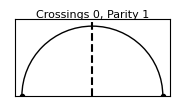

In [7]:
plot_all_topologies(1)

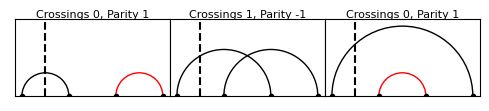

In [8]:
plot_all_topologies(2)

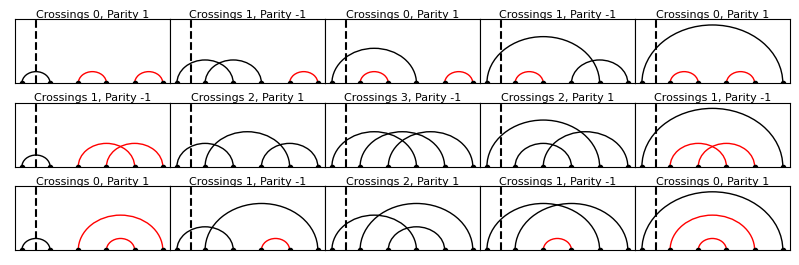

In [9]:
plot_all_topologies(3)

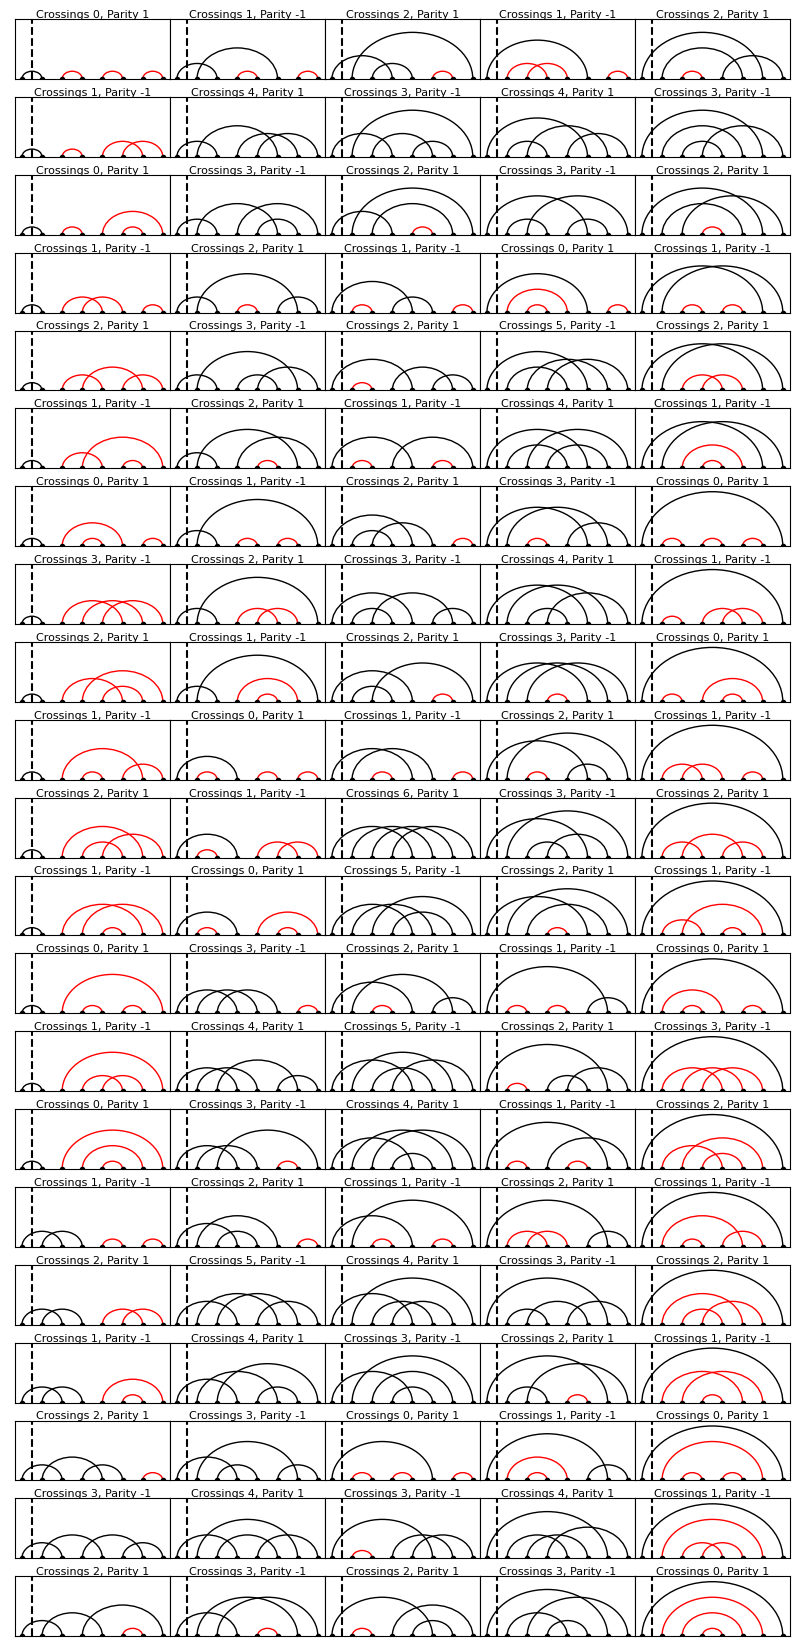

In [10]:
plot_all_topologies(4)

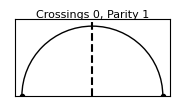

In [11]:
plot_k_connected_topologies(1, 1)

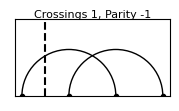

In [12]:
plot_k_connected_topologies(2, 1)

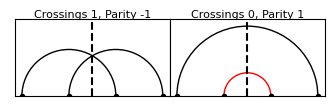

In [13]:
plot_k_connected_topologies(2, 2)

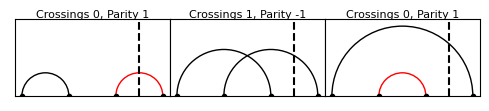

In [14]:
plot_k_connected_topologies(2, 3)

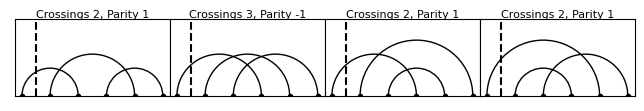

In [15]:
plot_k_connected_topologies(3, 1)

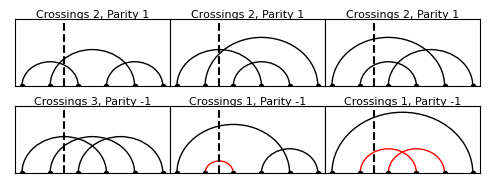

In [16]:
plot_k_connected_topologies(3, 2)

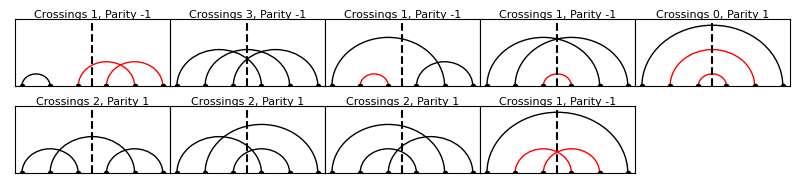

In [17]:
plot_k_connected_topologies(3, 3)

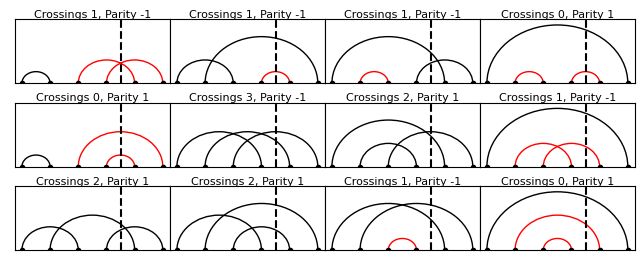

In [18]:
plot_k_connected_topologies(3, 4)

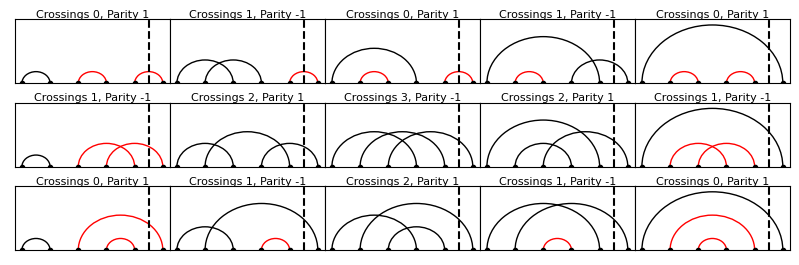

In [19]:
plot_k_connected_topologies(3, 5)

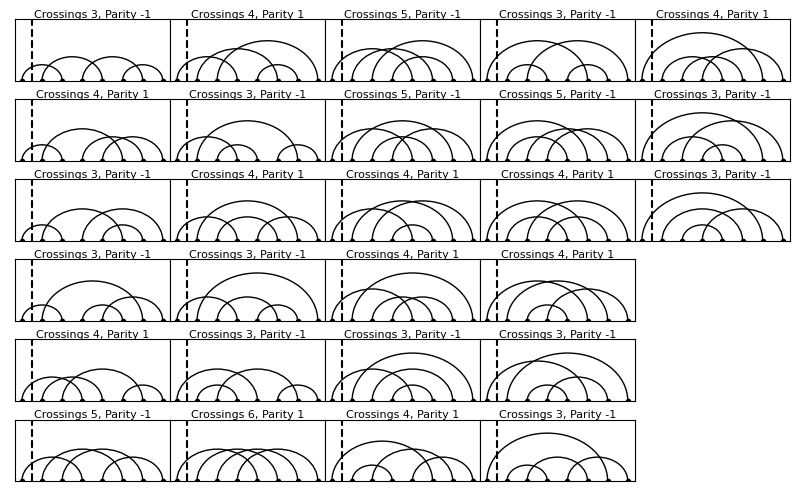

In [20]:
plot_k_connected_topologies(4, 1)

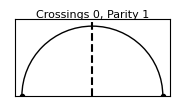

In [21]:
plot_doubly_k_connected_topologies(1, 1)

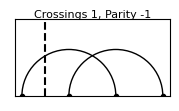

In [22]:
plot_doubly_k_connected_topologies(2, 1)

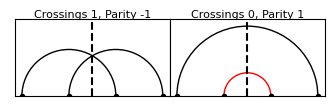

In [23]:
plot_doubly_k_connected_topologies(2, 2)

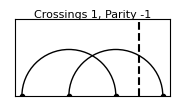

In [24]:
plot_doubly_k_connected_topologies(2, 3)

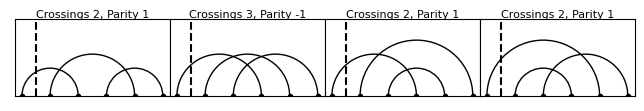

In [25]:
plot_doubly_k_connected_topologies(3, 1)

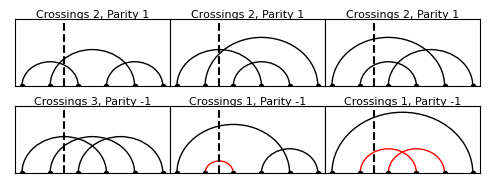

In [26]:
plot_doubly_k_connected_topologies(3, 2)

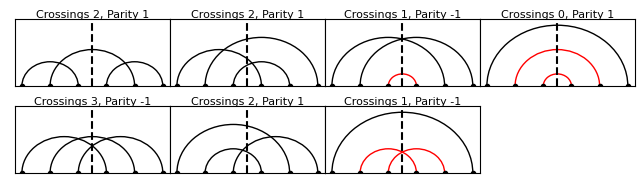

In [27]:
plot_doubly_k_connected_topologies(3, 3)

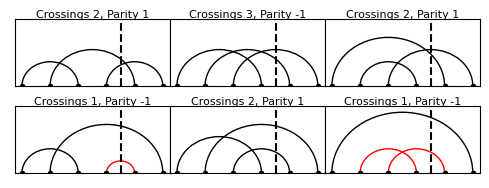

In [28]:
plot_doubly_k_connected_topologies(3, 4)

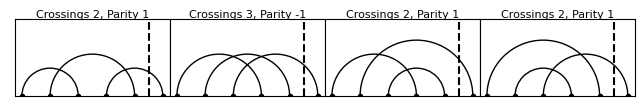

In [29]:
plot_doubly_k_connected_topologies(3, 5)

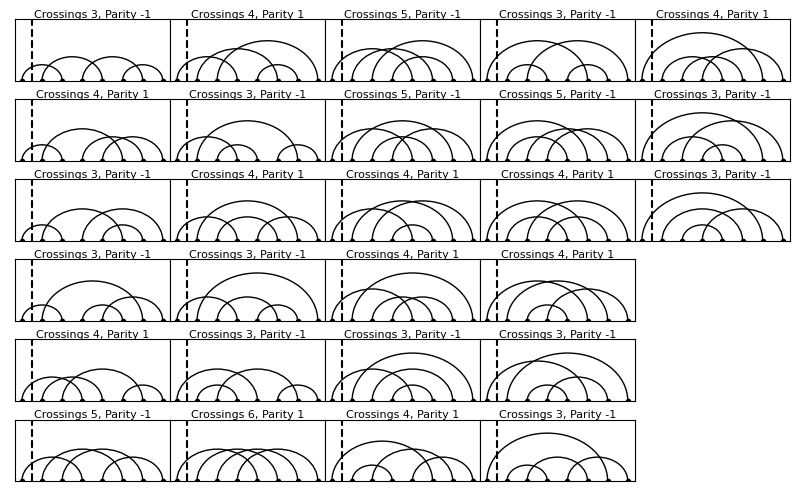

In [30]:
plot_doubly_k_connected_topologies(4, 1)

In [33]:
orders = 1:8

ntopos_1_connected_by_order = Vector{Int64}(undef, length(orders))

@printf("%-8s %-8s %16s %16s %18s\n", "order", "k", "all", "k-connected", "doubly-k-connected")
@printf("%-8s %-8s %16s %16s %18s\n", "=====", "=", "===", "===========", "==================")
for order in orders
    all_topos = diagrammatics.Topology.(diagrammatics.pair_partitions(order))
    ntopos = length(all_topos)
    
    for k in 1:(2order - 1)
        ntopos_k_connected = length(filter(top -> diagrammatics.is_k_connected(top, k), all_topos))
        ntopos_doubly_k_connected = length(filter(top -> diagrammatics.is_doubly_k_connected(top, k), all_topos))

        if k == 1
            ntopos_1_connected_by_order[order] = ntopos_k_connected
        end
        
        @printf("%-8d %-8d %16d %16d %18d\n", order, k, ntopos, ntopos_k_connected, ntopos_doubly_k_connected)
    end
end

order    k                     all      k-connected doubly-k-connected
=====    =                     ===      =========== ==================
1        1                       1                1                  1
2        1                       3                1                  1
2        2                       3                2                  2
2        3                       3                3                  1
3        1                      15                4                  4
3        2                      15                6                  6
3        3                      15                9                  7
3        4                      15               12                  6
3        5                      15               15                  4
4        1                     105               27                 27
4        2                     105               36                 36
4        3                     105               48                 40
4     

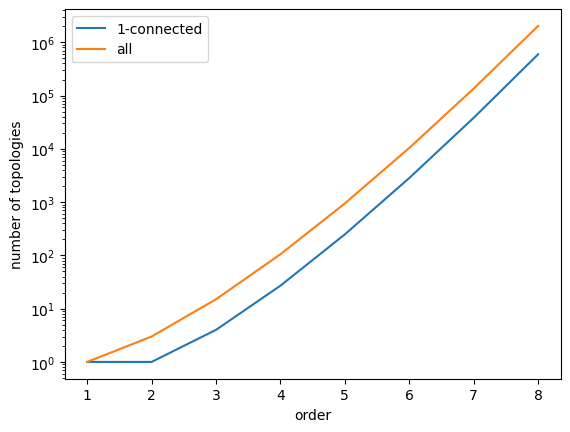

PyObject <matplotlib.legend.Legend object at 0x7f794a0d6fa0>

In [34]:
fig, ax = plt.subplots()
ax.plot(orders, ntopos_1_connected_by_order, label="1-connected")
ax.plot(orders, map(o -> diagrammatics.double_factorial(2o - 1), orders), label="all")
ax.set_xlabel("order")
ax.set_ylabel("number of topologies")
ax.set_yscale("log")
ax.legend()